Problem 1 Sharing and executing the official tutorial model

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# model architecture
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10)])

In [7]:
# not trained model 
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.19178984,  0.31784266,  1.0236989 ,  0.50632095, -0.16890879,
         0.5798656 ,  0.6453632 ,  0.33499464, -0.24420188, -0.15842783]],
      dtype=float32)

In [8]:
# softmax
tf.nn.softmax(predictions).numpy()

array([[0.05807476, 0.09667585, 0.19582471, 0.11672748, 0.05941889,
        0.12563573, 0.13414001, 0.09834834, 0.05510933, 0.06004494]],
      dtype=float32)

In [9]:
# loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
# loss debug
loss_fn(y_train[:1], predictions).numpy()

2.0743687

In [11]:
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1089 - accuracy: 0.9667
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9827
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9844
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.043

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0710 - accuracy: 0.9792 - 1s/epoch - 3ms/step


[0.07096211612224579, 0.979200005531311]

In [14]:
predictions = model(x_test[4:5]).numpy()
np.round(tf.nn.softmax(predictions).numpy().astype("float32"), 3)

array([[0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   ,
        0.001]], dtype=float32)

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [16]:
np.round(probability_model(x_test[:5]).numpy(), 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   ,
        0.001]], dtype=float32)

Problem 2 (Advance assignment) Execute various methods

In [17]:
df = pd.read_csv("../data/Iris.csv")

df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

X = np.array(X)
y = np.array(y)

y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Problem 3 Learning Iris (binary classification) with Keras

In [18]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [19]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                250       
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
4/4 - 1s - loss: 0.5465 - accuracy: 0.7812 - val_loss: 0.1708 - val_accuracy: 0.9375 - 730ms/epoch - 183ms/step
Epoch 2/20
4/4 - 0s - loss: 0.2142 - accuracy: 0.9375 - val_loss: 0.0586 - val_accuracy: 1.0000 - 84ms/epoch - 21ms/step
Epoch 3/20
4/4 - 0s - loss: 0.1072 - accuracy: 0.9688 - val_loss: 0.0215 - val_accuracy: 1.0000 - 75ms/epoch - 19ms/step
Epoch 4/20
4/4 - 0s - loss: 0.0794 - accuracy: 0.9688 - val_loss: 0.0105 - val_accuracy: 1.0000 - 84ms/epoch - 21ms/step
Epoch 5/20
4/4 - 0s - loss: 0.0593 - accuracy: 0.9688 - val_loss: 0.0100 - val_accuracy: 1.0000 - 83ms/epoch - 21ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0354 - accuracy: 0.9688 - val_loss: 0.0147 - val_accuracy: 1.0000 - 90ms/epoch - 22ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0230 - accuracy: 0.9844 - val_loss: 0.0252 - val_accuracy: 1.0000 - 82ms/epoch - 21ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 1.0000 - 66ms/epoch - 16ms/step
Epoch 9/20
4/4 - 0s - loss: 0.

In [24]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.001896680099889636
Train accuracy: 1.0


Problem 4 Learn Iris (multi-level classification) with Keras

In [25]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("../data/Iris.csv")

#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2

# One Hot encoder
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [26]:
# Standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [27]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                250       
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
5/5 - 1s - loss: 0.7489 - accuracy: 0.6042 - val_loss: 0.4833 - val_accuracy: 0.7917 - 660ms/epoch - 132ms/step
Epoch 2/20
5/5 - 0s - loss: 0.3447 - accuracy: 0.8958 - val_loss: 0.3395 - val_accuracy: 0.8750 - 72ms/epoch - 14ms/step
Epoch 3/20
5/5 - 0s - loss: 0.2375 - accuracy: 0.8958 - val_loss: 0.4198 - val_accuracy: 0.7917 - 84ms/epoch - 17ms/step
Epoch 4/20
5/5 - 0s - loss: 0.1918 - accuracy: 0.9062 - val_loss: 0.3330 - val_accuracy: 0.7917 - 79ms/epoch - 16ms/step
Epoch 5/20
5/5 - 0s - loss: 0.1091 - accuracy: 0.9583 - val_loss: 0.3489 - val_accuracy: 0.7917 - 70ms/epoch - 14ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0861 - accuracy: 0.9688 - val_loss: 0.2753 - val_accuracy: 0.8750 - 95ms/epoch - 19ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0709 - accuracy: 0.9688 - val_loss: 0.2664 - val_accuracy: 0.9167 - 86ms/epoch - 17ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0619 - accuracy: 0.9792 - val_loss: 0.2662 - val_accuracy: 0.9167 - 87ms/epoch - 17ms/step
Epoch 9/20
5/5 - 0s - loss: 0.

In [32]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.019336527213454247
Train accuracy: 1.0
Test loss: 0.007317726034671068
Test accuracy: 1.0


Problem 5 Learning House Prices with Keras

In [34]:
df = pd.read_csv("../data/train.csv")
#Condition extraction from data frame
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.log(np.array(y).reshape(-1, 1))
X = np.array(X).astype(np.float32)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [35]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_class = 1

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='linear'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                150       
                                                                 
 dense_9 (Dense)             (None, 100)               5100      
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
Total params: 5,553
Trainable params: 5,553
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='mean_squared_error',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['mse'])

In [39]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
47/47 - 1s - loss: 1285.2059 - mse: 1285.2059 - val_loss: 9.4423 - val_mse: 9.4423 - 699ms/epoch - 15ms/step
Epoch 2/20
47/47 - 0s - loss: 8.5788 - mse: 8.5788 - val_loss: 5.3417 - val_mse: 5.3417 - 183ms/epoch - 4ms/step
Epoch 3/20
47/47 - 0s - loss: 7.0743 - mse: 7.0743 - val_loss: 4.6730 - val_mse: 4.6730 - 145ms/epoch - 3ms/step
Epoch 4/20
47/47 - 0s - loss: 5.0415 - mse: 5.0415 - val_loss: 3.8308 - val_mse: 3.8308 - 176ms/epoch - 4ms/step
Epoch 5/20
47/47 - 0s - loss: 4.3793 - mse: 4.3793 - val_loss: 3.2131 - val_mse: 3.2131 - 179ms/epoch - 4ms/step
Epoch 6/20
47/47 - 0s - loss: 4.2454 - mse: 4.2454 - val_loss: 2.9097 - val_mse: 2.9097 - 176ms/epoch - 4ms/step
Epoch 7/20
47/47 - 0s - loss: 3.5021 - mse: 3.5021 - val_loss: 2.8744 - val_mse: 2.8744 - 167ms/epoch - 4ms/step
Epoch 8/20
47/47 - 0s - loss: 2.9034 - mse: 2.9034 - val_loss: 2.8878 - val_mse: 2.8878 - 165ms/epoch - 4ms/step
Epoch 9/20
47/47 - 0s - loss: 2.8838 - mse: 2.8838 - val_loss: 2.2396 - val_mse: 2.2396 -

In [40]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train mse:', train_score[1])
print('Test loss:', test_score[0])
print('Test mse:', test_score[1])

Train loss: 1.6824612617492676
Train mse: 1.6824612617492676
Test loss: 3.1086506843566895
Test mse: 3.1086506843566895


Problem 6 Learning MNIST with Keras

In [41]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (10000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


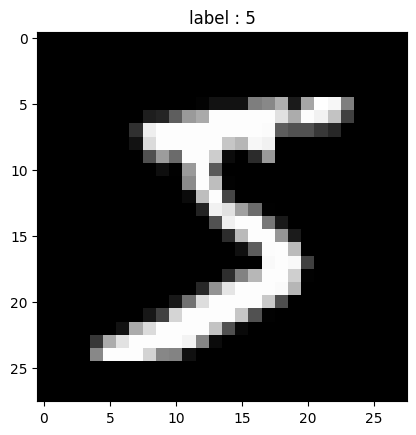

In [44]:
index = 0
image = X_train[index].reshape(28,28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [46]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train = X_train / 255.0
X_test = X_test / 255.0

enc = OneHotEncoder(handle_unknown='ignore')
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_one_hot = enc.transform(y_test[:, np.newaxis]).toarray()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(48000, 784)
(10000, 784)


In [47]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

Model architecture

In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                39250     
                                                                 
 dense_12 (Dense)            (None, 100)               5100      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.2888 - accuracy: 0.9146 - val_loss: 0.1731 - val_accuracy: 0.9474
Epoch 2/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1396 - accuracy: 0.9581 - val_loss: 0.1193 - val_accuracy: 0.9629
Epoch 3/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1021 - accuracy: 0.9693 - val_loss: 0.1257 - val_accuracy: 0.9630
Epoch 4/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0819 - accuracy: 0.9738 - val_loss: 0.1095 - val_accuracy: 0.9672
Epoch 5/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.1255 - val_accuracy: 0.9603
Epoch 6/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0549 - accuracy: 0.9820 - val_loss: 0.1054 - val_accuracy: 0.9671
Epoch 7/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0458 - accuracy: 0.9847 - val_loss: 0.1004 - val_accuracy:

In [52]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test_one_hot, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.016615191474556923
Train accuracy: 0.9944791793823242
Test loss: 0.11973288655281067
Test accuracy: 0.9710000157356262


Problem 7 (Advance assignment) Rewriting to PyTorch

In [53]:
!pip install torch

In [54]:
df = pd.read_csv("../data/Iris.csv")

#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [55]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [56]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [57]:
import torch
import torch.nn as nn

In [58]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [59]:
class Loader:

    def __init__(self, x, y, shuffle=True, batch_size=16):
        
        self.X = x
        self.y = y.astype("float32")

        self.shuffle = shuffle
        self.batch_size = batch_size
        self.n_conts = self.X.shape[1]
        self.len = self.X.shape[0]
        n_batches, remainder = divmod(self.len, self.batch_size)

        if remainder > 0:
            n_batches += 1
        self.n_batches = n_batches
        self.remainder = remainder  # for debugging

        self.idxes = np.array([i for i in range(self.len)])

    def __iter__(self):
        self.i = 0
        if self.shuffle:
            ridxes = self.idxes
            np.random.shuffle(ridxes)
            self.X = self.X[ridxes]
            if self.y is not None:
                self.y = self.y[ridxes]

        return self

    def __next__(self):
        if self.i >= self.len:
            raise StopIteration

        X = torch.FloatTensor(self.X[self.i:self.i + self.batch_size, :])
    
        if self.y is not None:
       
            y = torch.FloatTensor(self.y[self.i:self.i + self.batch_size])
     
        else:
            y = None


        batch = (X, y) 
        self.i += self.batch_size
        return batch

    def __len__(self):
        return self.n_batches

In [60]:
# pytorch dataloader 
train_loader = Loader(X_train, y_train)
val_loader = Loader(X_val, y_val)
test_loader = Loader(X_test, y_test)

In [61]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(hidden_size2, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.out(out)
        return out

In [62]:
model = NeuralNet(input_size=n_input,
                  hidden_size1=n_hidden1,
                  hidden_size2=n_hidden2,
                  num_classes=n_classes).to(device)

In [63]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):  
        # Move tensors to the configured device
        x = x.to(device)
        y = y.to(device)
        
        # Forward pass
        logit = model(x)
        loss = criterion(logit, y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [2/4], Loss: 0.6115
Epoch [1/20], Step [4/4], Loss: 0.4241
Epoch [2/20], Step [2/4], Loss: 0.3304
Epoch [2/20], Step [4/4], Loss: 0.2449
Epoch [3/20], Step [2/4], Loss: 0.0738
Epoch [3/20], Step [4/4], Loss: 0.2000
Epoch [4/20], Step [2/4], Loss: 0.2150
Epoch [4/20], Step [4/4], Loss: 0.0087
Epoch [5/20], Step [2/4], Loss: 0.0066
Epoch [5/20], Step [4/4], Loss: 0.0068
Epoch [6/20], Step [2/4], Loss: 0.0110
Epoch [6/20], Step [4/4], Loss: 0.0252
Epoch [7/20], Step [2/4], Loss: 0.0352
Epoch [7/20], Step [4/4], Loss: 0.0788
Epoch [8/20], Step [2/4], Loss: 0.0122
Epoch [8/20], Step [4/4], Loss: 0.0514
Epoch [9/20], Step [2/4], Loss: 0.0212
Epoch [9/20], Step [4/4], Loss: 0.0306
Epoch [10/20], Step [2/4], Loss: 0.0080
Epoch [10/20], Step [4/4], Loss: 0.0164
Epoch [11/20], Step [2/4], Loss: 0.0121
Epoch [11/20], Step [4/4], Loss: 0.0121
Epoch [12/20], Step [2/4], Loss: 0.0084
Epoch [12/20], Step [4/4], Loss: 0.0003
Epoch [13/20], Step [2/4], Loss: 0.0048
Epoch [13/20], Ste

In [64]:
y_true = []
preds = []
for i, (x, y) in enumerate(val_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    preds.append(logit.sigmoid())

In [65]:
preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

1.0

In [67]:
y_true = []
preds = []
for i, (x, y) in enumerate(test_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    preds.append(logit.sigmoid())

preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

0.9

Multi classification: Iris Dataset on Pytorch

In [68]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("../data/Iris.csv")

#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [69]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [70]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [71]:
model = NeuralNet(input_size=n_input,
                  hidden_size1=n_hidden1,
                  hidden_size2=n_hidden2,
                  num_classes=n_classes).to(device)
model

NeuralNet(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (relu2): ReLU()
  (out): Linear(in_features=100, out_features=3, bias=True)
)

In [72]:
# pytorch dataloader 
train_loader = Loader(X_train, y_train)
val_loader = Loader(X_val, y_val)
test_loader = Loader(X_test, y_test)

In [73]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):  
        # Move tensors to the configured device
        x = x.to(device)
        y = y.to(device)
        
        # Forward pass
        logit = model(x)
        loss = criterion(logit, y.long())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [2/6], Loss: 0.9372
Epoch [1/20], Step [4/6], Loss: 0.5894
Epoch [1/20], Step [6/6], Loss: 0.3000
Epoch [2/20], Step [2/6], Loss: 0.2084
Epoch [2/20], Step [4/6], Loss: 0.3168
Epoch [2/20], Step [6/6], Loss: 0.4394
Epoch [3/20], Step [2/6], Loss: 0.0206
Epoch [3/20], Step [4/6], Loss: 0.0956
Epoch [3/20], Step [6/6], Loss: 0.1407
Epoch [4/20], Step [2/6], Loss: 0.1964
Epoch [4/20], Step [4/6], Loss: 0.1322
Epoch [4/20], Step [6/6], Loss: 0.0567
Epoch [5/20], Step [2/6], Loss: 0.0895
Epoch [5/20], Step [4/6], Loss: 0.0851
Epoch [5/20], Step [6/6], Loss: 0.0214
Epoch [6/20], Step [2/6], Loss: 0.1389
Epoch [6/20], Step [4/6], Loss: 0.0900
Epoch [6/20], Step [6/6], Loss: 0.0056
Epoch [7/20], Step [2/6], Loss: 0.0020
Epoch [7/20], Step [4/6], Loss: 0.0444
Epoch [7/20], Step [6/6], Loss: 0.1072
Epoch [8/20], Step [2/6], Loss: 0.0088
Epoch [8/20], Step [4/6], Loss: 0.2429
Epoch [8/20], Step [6/6], Loss: 0.0025
Epoch [9/20], Step [2/6], Loss: 0.0135
Epoch [9/20], Step [4/6],

In [74]:
y_true = []
preds = []
for i, (x, y) in enumerate(test_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    _, predicted = torch.max(logit.data, 1)
    preds.append(predicted)

preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

0.8

MNIST TASK

In [75]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [76]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [77]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [78]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:07<00:00, 1318332.62it/s]


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 117308.39it/s]


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:02<00:00, 657919.45it/s]


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 1274197.63it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



In [79]:
test_dataset = torchvision.datasets.MNIST(root='../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [80]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [81]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [82]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [83]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [84]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [85]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4331
Epoch [1/5], Step [200/600], Loss: 0.3831
Epoch [1/5], Step [300/600], Loss: 0.1894
Epoch [1/5], Step [400/600], Loss: 0.2184
Epoch [1/5], Step [500/600], Loss: 0.2017
Epoch [1/5], Step [600/600], Loss: 0.1239
Epoch [2/5], Step [100/600], Loss: 0.0592
Epoch [2/5], Step [200/600], Loss: 0.1474
Epoch [2/5], Step [300/600], Loss: 0.0833
Epoch [2/5], Step [400/600], Loss: 0.1402
Epoch [2/5], Step [500/600], Loss: 0.1368
Epoch [2/5], Step [600/600], Loss: 0.1941
Epoch [3/5], Step [100/600], Loss: 0.0694
Epoch [3/5], Step [200/600], Loss: 0.1141
Epoch [3/5], Step [300/600], Loss: 0.2030
Epoch [3/5], Step [400/600], Loss: 0.0423
Epoch [3/5], Step [500/600], Loss: 0.0637
Epoch [3/5], Step [600/600], Loss: 0.0695
Epoch [4/5], Step [100/600], Loss: 0.0215
Epoch [4/5], Step [200/600], Loss: 0.0358
Epoch [4/5], Step [300/600], Loss: 0.1295
Epoch [4/5], Step [400/600], Loss: 0.0487
Epoch [4/5], Step [500/600], Loss: 0.0300
Epoch [4/5], Step [600/600], Loss:

In [86]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.15 %


In [88]:
# Save the model checkpoint
torch.save(model.state_dict(), '../data/model.ckpt')